In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Свойства материалов

In [2]:
visc = 0.0002903
print('Вязкость нефтепродуктов', visc)
roil = 685
print('Плотность нефтепродуктов', roil)
sigma = 0.01612
print('Коэффициент поверхностного натяжения нефтепродуктов', sigma)
rH2 = 5
print('Плотность H2', rH2)
viscH2 = 1.398e-05
print('Вязкость H2', viscH2)

Вязкость нефтепродуктов 0.0002903
Плотность нефтепродуктов 685
Коэффициент поверхностного натяжения нефтепродуктов 0.01612
Плотность H2 5
Вязкость H2 1.398e-05


## Геометрия и скорости потока

Геометрия канала для подвода нефтепродуктов

In [3]:
doil = 0.005
ioil = 98*2+97
Soil = (np.pi*doil**2)/4*ioil
print('Площадь проходного сечения суммарного', Soil)

Площадь проходного сечения суммарного 0.005753041546886308


In [4]:
S1gas = 1.5*0.03
print('Первое сечение канала подвода H2', S1gas)
dgas = 0.015
igas = 55*8
S2gas = (np.pi*dgas**2)/4*igas
print('Второе сечение канала подвода H2', S2gas)
S3gas = 1.5*(0.36-0.13)
print('Третье сечение канала подвода H2', S3gas)

Первое сечение канала подвода H2 0.045
Второе сечение канала подвода H2 0.07775441817634737
Третье сечение канала подвода H2 0.345


In [5]:
VFgas = 45663/3.3743/3600/2
VFoil = 116756/685/3600/2
print('Объемный расход H2', VFgas)
print('Объемный расход нефтепродуктов', VFoil)

Объемный расход H2 1.8795256300072116
Объемный расход нефтепродуктов 0.02367315490673155


In [6]:
Vel_gas1 = VFgas/S1gas
Vel_gas2 = VFgas/S2gas
Vel_gas3 = VFgas/S3gas
print ('Расходная скорость газа в сечении 1', Vel_gas1)
print ('Расходная скорость газа в сечении 2', Vel_gas2)
print ('Расходная скорость газа в сечении 3', Vel_gas3)

Расходная скорость газа в сечении 1 41.76723622238248
Расходная скорость газа в сечении 2 24.172589469378305
Расходная скорость газа в сечении 3 5.447900376832498


## Коэффициент расхода и среднерасходная скорость в канале

In [7]:
# Длина канала
lc = 0.01 
# Относительная длина канала (характерные значения 3<<6)
lrel=lc/doil
print('Относительная длина канала:', lrel)

Относительная длина канала: 2.0


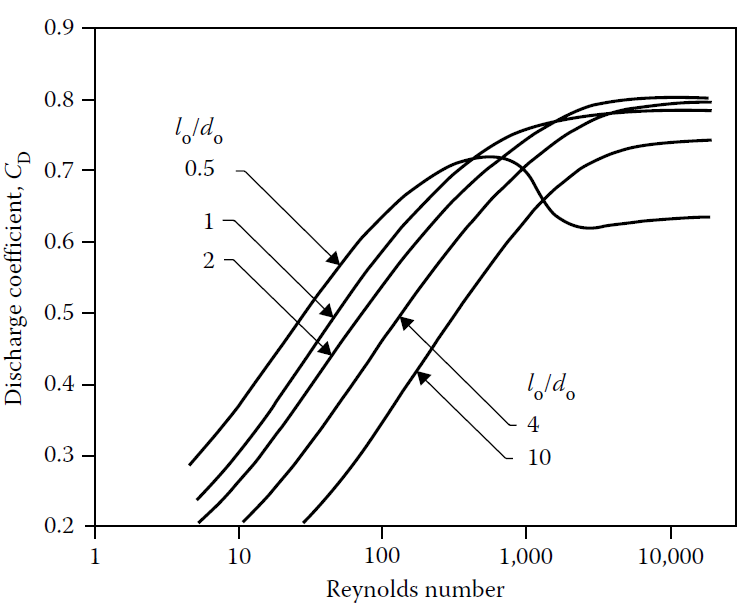

In [8]:
Cd = 0.53

**Число Рейнольдса**

In [9]:
Vel_oil = VFoil/Soil/0.73

In [10]:
Re = Vel_oil*doil*roil/visc
print('Число Рейнольдса', Re)

Число Рейнольдса 66504.23611843944


According to Nakayama коэффициент расхода:

In [11]:
Cd = pow(Re,5/6)/(17.11*lc/doil+ 1.65*pow(Re,0.8))
print('Коэффициент расхода по Nakayama', Cd)

Коэффициент расхода по Nakayama 0.8750467209689788


Примем среднее значение

In [12]:
Cd = 0.5

In [13]:
Vel_oil = VFoil/Soil/Cd
print ('Расходная скорость для нефтепродуктов', Vel_oil)

Расходная скорость для нефтепродуктов 8.229787570209382


**Пересчет Числа Рейнольдса**

In [14]:
Re = Vel_oil*doil*roil/visc
print('Число Рейнольдса', Re)

Число Рейнольдса 97096.18473292157


In [15]:
Vel_oil

8.229787570209382

In [16]:
doil

0.005

In [17]:
roil

685

In [18]:
visc

0.0002903

## Распад капель

In [19]:
G1oil = 116756/3600/2/ioil
print('Массовый расход нефтепродуктов, на один канал', G1oil)

Массовый расход нефтепродуктов, на один канал 0.05534508911642017


For a typical hydrocarbon fuel, in the absence of frictional losses a nozzle pressure drop of 138 kPa (20 psi) produces an exit velocity of 18.6 m/s. As velocity increases as the square root of the pressure, at 689 kPa (100 psi) a velocity of 41.5 m/s is obtained, while 5.5 MPa (800 psi) produces 117 m/s [1]

[1] A. Lefebvre, Atomization and Sprays, Hemisphere Publishing, New York, 1989

p 107       Значения коэффициента расходы

**Минимальная скорость истечения из канала для распады струи**

In [20]:
Ukr = np.sqrt(8*sigma/doil/roil) 
print('Критическая скорость истечения для распада струи', Ukr)

Критическая скорость истечения для распада струи 0.19404266217645424


**Число Вебера**

In [21]:
We_l = Vel_oil*Vel_oil*doil*roil/sigma
We_g = Vel_oil*Vel_oil*doil*rH2/sigma
print('Число Вебера по топливу', We_l)
print('Число Вебера по H2', We_g)

Число Вебера по топливу 14390.397445341005
Число Вебера по H2 105.03939741124822


In [22]:
np.sqrt(We_l)/Re

0.0012354757605884954

**Число Онезорге**

In [23]:
Oh = visc/np.sqrt(roil*sigma*doil)
print('Число Онезорге', Oh)

Число Онезорге 0.0012354757605884954


**Режимы распада по критериальным числам**

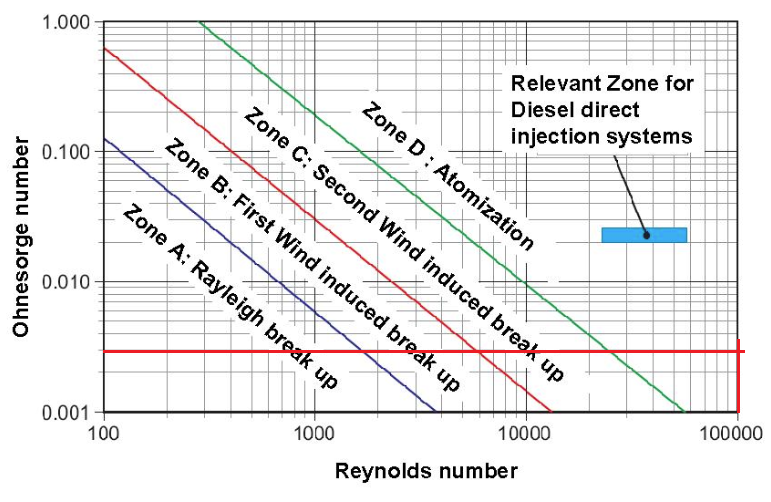

**Вывод:** Second Wind induced break up regime

**Диаметр капли нефтепродуктов** (by Harmon [8])

In [24]:
ddrop = 3330*pow(doil, 0.3)* pow(visc, 0.07)* pow(roil, -0.648)*pow(sigma, -0.15)*pow(Vel_oil, -0.55)*pow(rH2, -0.052)*pow(viscH2, 0.78)
print('Характерный дааметр капель', ddrop)

Характерный дааметр капель 0.0004893140554623397


In [26]:
test = 0